# The Ornstein-Uhlenbeck Process

## Introduction

The **Ornstein-Uhlenbeck (OU) process** is a fundamental stochastic process that describes the velocity of a particle undergoing Brownian motion with friction. Unlike standard Brownian motion, the OU process exhibits **mean reversion**, making it essential in physics, finance, and biology.

## Mathematical Foundation

### The Stochastic Differential Equation

The OU process $X_t$ satisfies the following stochastic differential equation (SDE):

$$dX_t = \theta(\mu - X_t)\,dt + \sigma\,dW_t$$

where:
- $\theta > 0$ is the **rate of mean reversion** (how quickly the process reverts to the mean)
- $\mu$ is the **long-term mean** (equilibrium level)
- $\sigma > 0$ is the **volatility** (diffusion coefficient)
- $W_t$ is a standard **Wiener process** (Brownian motion)

### Physical Interpretation

Originally derived by Leonard Ornstein and George Uhlenbeck in 1930, this process models the velocity of a massive Brownian particle under the influence of friction. The drift term $\theta(\mu - X_t)$ represents a restoring force that pulls the process toward $\mu$.

### Analytical Solution

The SDE has an explicit solution. Given initial condition $X_0 = x_0$, the solution is:

$$X_t = \mu + (x_0 - \mu)e^{-\theta t} + \sigma\int_0^t e^{-\theta(t-s)}\,dW_s$$

The process $X_t$ is Gaussian with:

**Mean:**
$$\mathbb{E}[X_t] = \mu + (x_0 - \mu)e^{-\theta t}$$

**Variance:**
$$\text{Var}(X_t) = \frac{\sigma^2}{2\theta}\left(1 - e^{-2\theta t}\right)$$

### Stationary Distribution

As $t \to \infty$, the process converges to a **stationary distribution**:

$$X_\infty \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{2\theta}\right)$$

The stationary variance $\sigma^2/(2\theta)$ reflects the balance between random fluctuations ($\sigma$) and mean reversion ($\theta$).

### Autocovariance Function

For the stationary process, the autocovariance function is:

$$\text{Cov}(X_t, X_{t+s}) = \frac{\sigma^2}{2\theta}e^{-\theta|s|}$$

This exponential decay is characteristic of the OU process.

## Numerical Simulation

We employ the **Euler-Maruyama method** to discretize the SDE:

$$X_{t+\Delta t} = X_t + \theta(\mu - X_t)\Delta t + \sigma\sqrt{\Delta t}\,Z$$

where $Z \sim \mathcal{N}(0,1)$ is a standard normal random variable.

Alternatively, we can use the **exact discretization** since the transition distribution is known:

$$X_{t+\Delta t} \mid X_t \sim \mathcal{N}\left(\mu + (X_t - \mu)e^{-\theta\Delta t}, \frac{\sigma^2}{2\theta}(1 - e^{-2\theta\Delta t})\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# OU Process parameters
theta = 1.0    # Mean reversion rate
mu = 0.0       # Long-term mean
sigma = 0.3    # Volatility
x0 = 1.0       # Initial condition

# Simulation parameters
T = 10.0       # Total time
dt = 0.01      # Time step
n_steps = int(T / dt)
n_paths = 50   # Number of sample paths

# Time array
t = np.linspace(0, T, n_steps + 1)

def simulate_ou_exact(theta, mu, sigma, x0, T, dt, n_paths):
    """
    Simulate Ornstein-Uhlenbeck process using exact discretization.
    
    Parameters:
    -----------
    theta : float - Mean reversion rate
    mu : float - Long-term mean
    sigma : float - Volatility
    x0 : float - Initial value
    T : float - Total simulation time
    dt : float - Time step
    n_paths : int - Number of sample paths
    
    Returns:
    --------
    X : ndarray - Simulated paths (n_steps+1, n_paths)
    """
    n_steps = int(T / dt)
    X = np.zeros((n_steps + 1, n_paths))
    X[0, :] = x0
    
    # Precompute constants for exact discretization
    exp_theta = np.exp(-theta * dt)
    std_dt = np.sqrt(sigma**2 / (2 * theta) * (1 - np.exp(-2 * theta * dt)))
    
    for i in range(n_steps):
        Z = np.random.standard_normal(n_paths)
        X[i+1, :] = mu + (X[i, :] - mu) * exp_theta + std_dt * Z
    
    return X

# Simulate paths
X = simulate_ou_exact(theta, mu, sigma, x0, T, dt, n_paths)

print(f"Simulated {n_paths} paths of OU process")
print(f"Parameters: θ={theta}, μ={mu}, σ={sigma}")
print(f"Theoretical stationary variance: {sigma**2/(2*theta):.4f}")

Simulated 50 paths of OU process
Parameters: θ=1.0, μ=0.0, σ=0.3
Theoretical stationary variance: 0.0450


In [2]:
# Compute theoretical mean and standard deviation bounds
theoretical_mean = mu + (x0 - mu) * np.exp(-theta * t)
theoretical_var = sigma**2 / (2 * theta) * (1 - np.exp(-2 * theta * t))
theoretical_std = np.sqrt(theoretical_var)

# Compute empirical statistics
empirical_mean = np.mean(X, axis=1)
empirical_std = np.std(X, axis=1)

# Stationary distribution parameters
stationary_mean = mu
stationary_std = sigma / np.sqrt(2 * theta)

print(f"\nStationary distribution: N({stationary_mean}, {stationary_std**2:.4f})")
print(f"At t={T}: Empirical mean = {empirical_mean[-1]:.4f}, Theoretical mean = {theoretical_mean[-1]:.4f}")
print(f"At t={T}: Empirical std = {empirical_std[-1]:.4f}, Theoretical std = {theoretical_std[-1]:.4f}")


Stationary distribution: N(0.0, 0.0450)
At t=10.0: Empirical mean = 0.0078, Theoretical mean = 0.0000
At t=10.0: Empirical std = 0.1770, Theoretical std = 0.2121


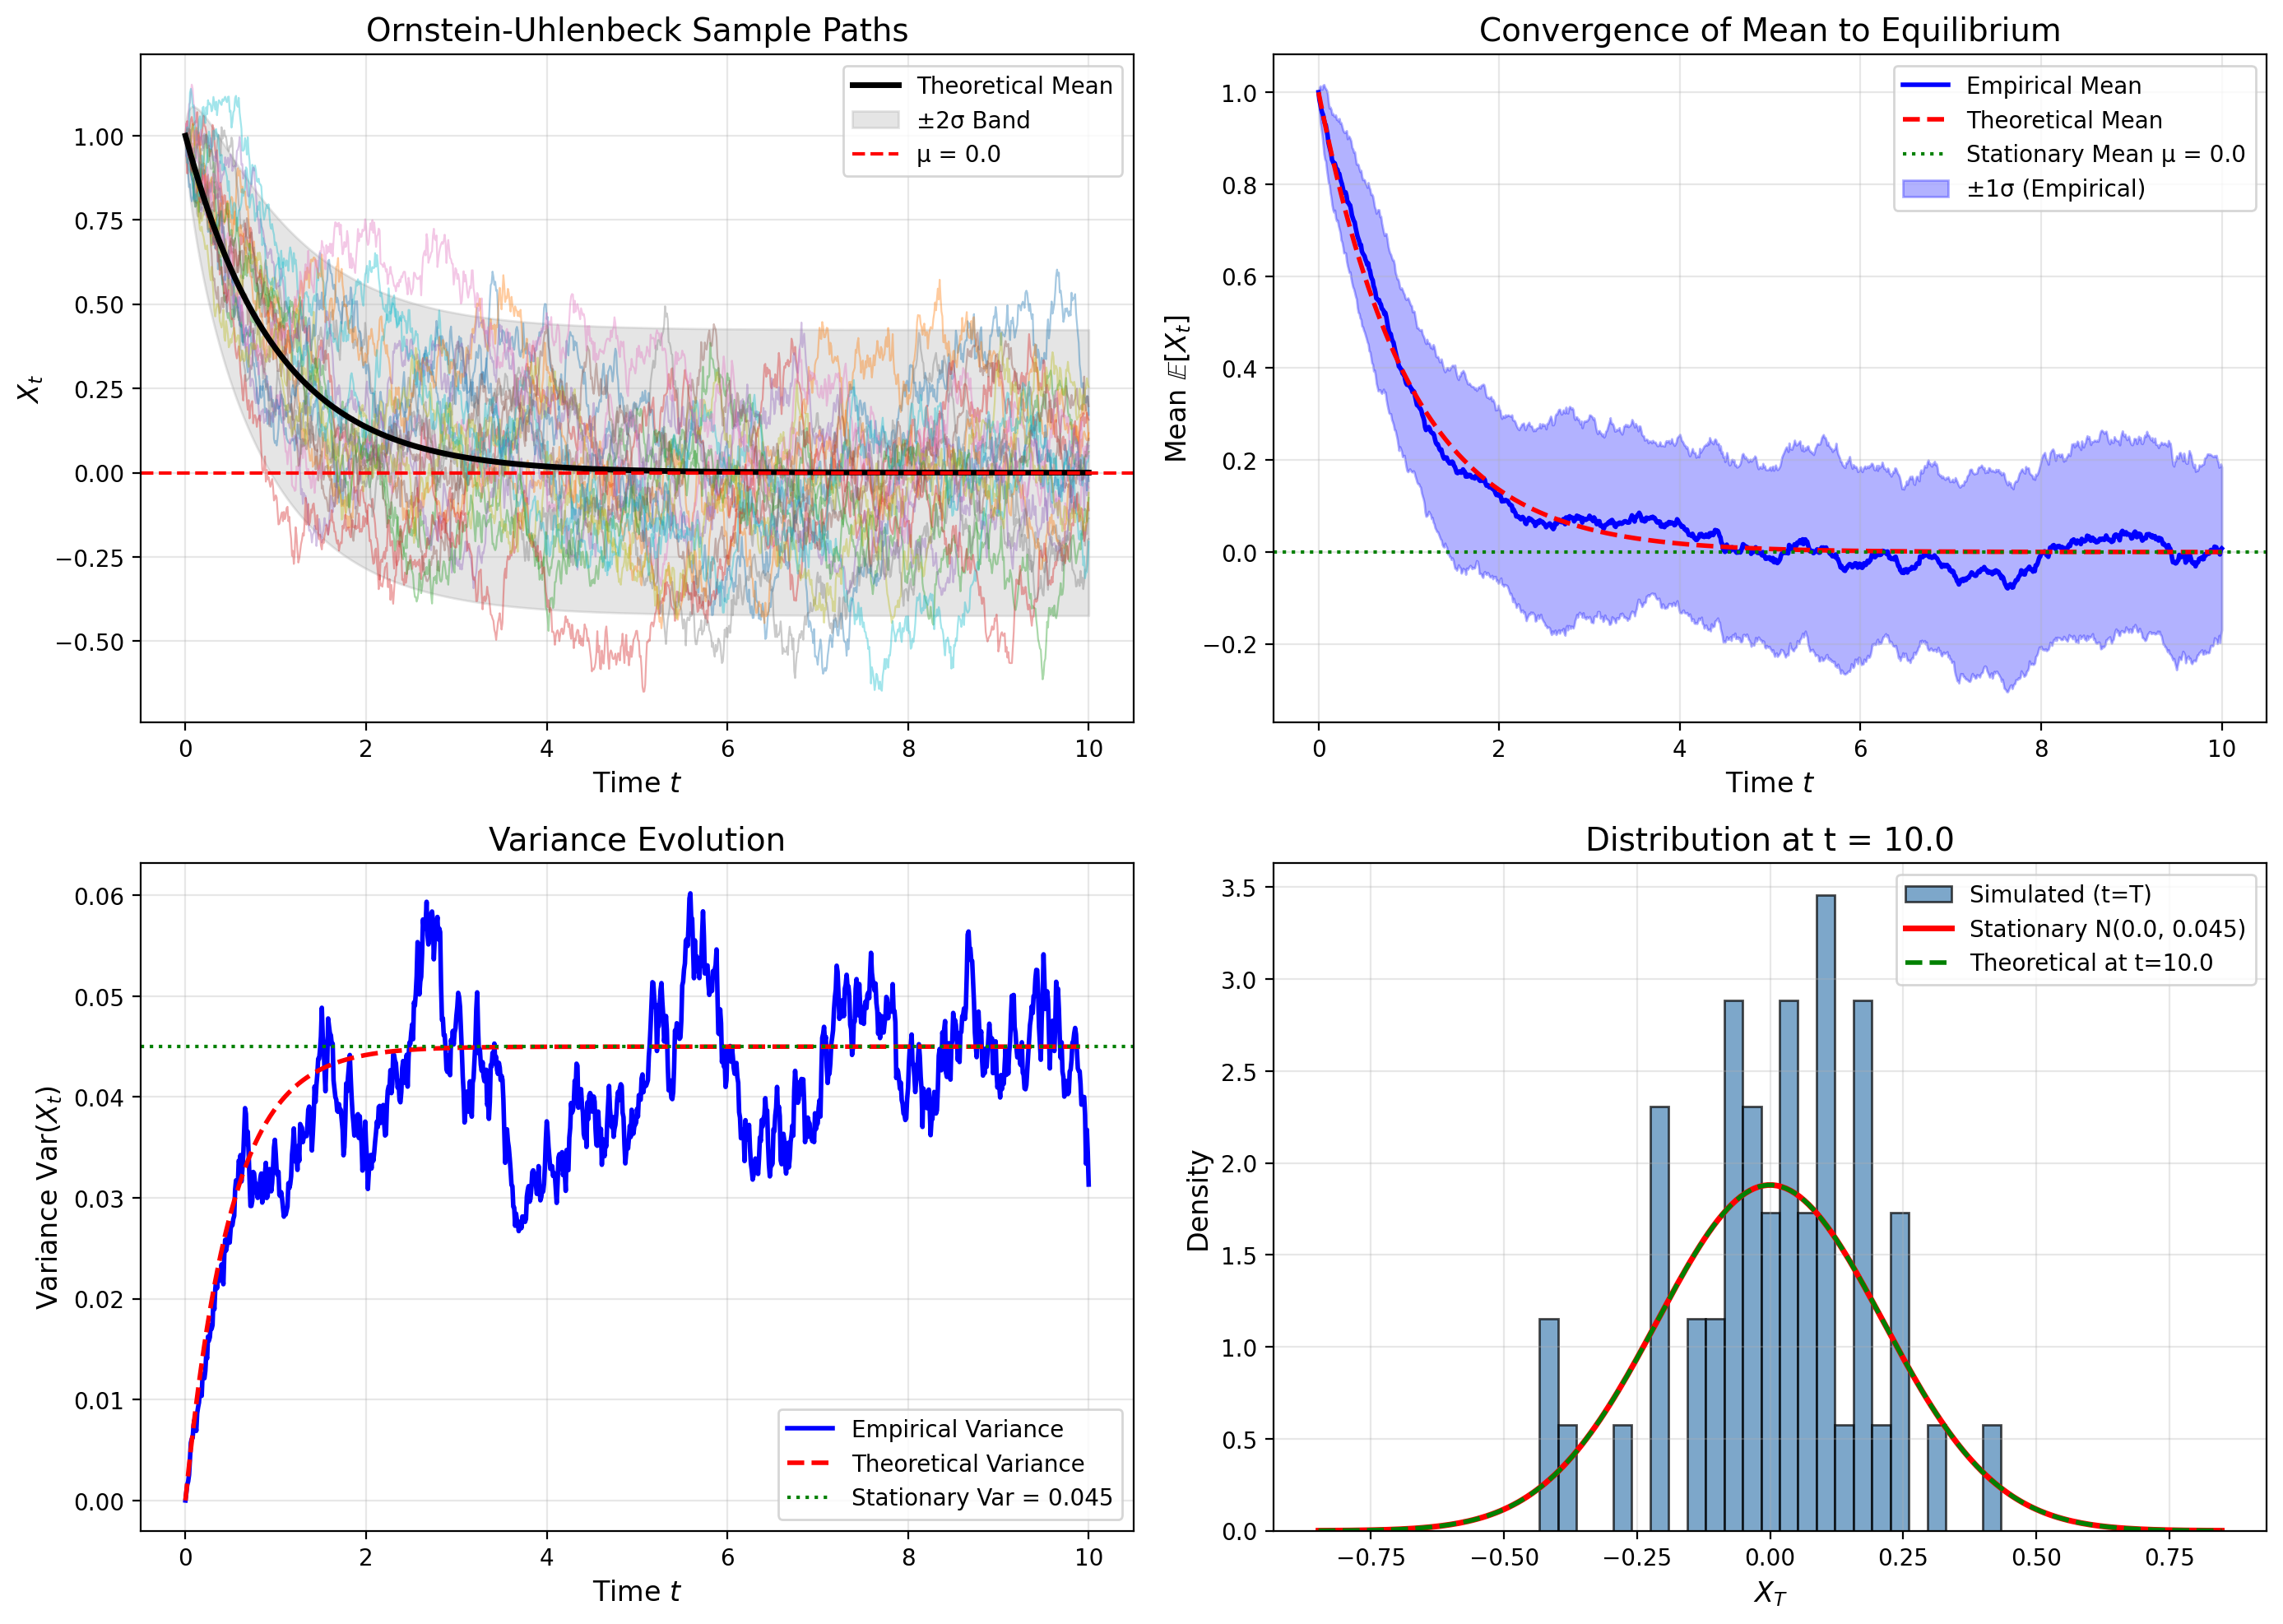


Plot saved to 'plot.png'


In [3]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Panel 1: Sample paths with confidence bands
ax1 = axes[0, 0]
for i in range(min(20, n_paths)):
    ax1.plot(t, X[:, i], alpha=0.4, linewidth=0.8)

ax1.plot(t, theoretical_mean, 'k-', linewidth=2.5, label='Theoretical Mean')
ax1.fill_between(t, 
                  theoretical_mean - 2*theoretical_std, 
                  theoretical_mean + 2*theoretical_std,
                  alpha=0.2, color='gray', label='±2σ Band')
ax1.axhline(y=mu, color='r', linestyle='--', linewidth=1.5, label=f'μ = {mu}')
ax1.set_xlabel('Time $t$', fontsize=12)
ax1.set_ylabel('$X_t$', fontsize=12)
ax1.set_title('Ornstein-Uhlenbeck Sample Paths', fontsize=14)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

# Panel 2: Mean convergence
ax2 = axes[0, 1]
ax2.plot(t, empirical_mean, 'b-', linewidth=2, label='Empirical Mean')
ax2.plot(t, theoretical_mean, 'r--', linewidth=2, label='Theoretical Mean')
ax2.axhline(y=mu, color='green', linestyle=':', linewidth=1.5, label=f'Stationary Mean μ = {mu}')
ax2.fill_between(t, 
                  empirical_mean - empirical_std, 
                  empirical_mean + empirical_std,
                  alpha=0.3, color='blue', label='±1σ (Empirical)')
ax2.set_xlabel('Time $t$', fontsize=12)
ax2.set_ylabel('Mean $\\mathbb{E}[X_t]$', fontsize=12)
ax2.set_title('Convergence of Mean to Equilibrium', fontsize=14)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)

# Panel 3: Variance evolution
ax3 = axes[1, 0]
empirical_variance = np.var(X, axis=1)
ax3.plot(t, empirical_variance, 'b-', linewidth=2, label='Empirical Variance')
ax3.plot(t, theoretical_var, 'r--', linewidth=2, label='Theoretical Variance')
ax3.axhline(y=sigma**2/(2*theta), color='green', linestyle=':', 
            linewidth=1.5, label=f'Stationary Var = {sigma**2/(2*theta):.3f}')
ax3.set_xlabel('Time $t$', fontsize=12)
ax3.set_ylabel('Variance $\\text{Var}(X_t)$', fontsize=12)
ax3.set_title('Variance Evolution', fontsize=14)
ax3.legend(loc='lower right', fontsize=10)
ax3.grid(True, alpha=0.3)

# Panel 4: Terminal distribution vs stationary distribution
ax4 = axes[1, 1]
# Histogram of terminal values
terminal_values = X[-1, :]
ax4.hist(terminal_values, bins=25, density=True, alpha=0.7, 
         color='steelblue', edgecolor='black', label='Simulated (t=T)')

# Theoretical stationary density
x_range = np.linspace(mu - 4*stationary_std, mu + 4*stationary_std, 200)
stationary_pdf = stats.norm.pdf(x_range, mu, stationary_std)
ax4.plot(x_range, stationary_pdf, 'r-', linewidth=2.5, 
         label=f'Stationary N({mu}, {stationary_std**2:.3f})')

# Theoretical distribution at time T
theoretical_mean_T = mu + (x0 - mu) * np.exp(-theta * T)
theoretical_std_T = np.sqrt(sigma**2 / (2*theta) * (1 - np.exp(-2*theta*T)))
theoretical_pdf_T = stats.norm.pdf(x_range, theoretical_mean_T, theoretical_std_T)
ax4.plot(x_range, theoretical_pdf_T, 'g--', linewidth=2, 
         label=f'Theoretical at t={T}')

ax4.set_xlabel('$X_T$', fontsize=12)
ax4.set_ylabel('Density', fontsize=12)
ax4.set_title(f'Distribution at t = {T}', fontsize=14)
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ornstein_uhlenbeck_process_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

In [4]:
# Verify statistical properties with hypothesis tests
print("="*60)
print("STATISTICAL VERIFICATION")
print("="*60)

# Test 1: Kolmogorov-Smirnov test for normality at t=T
terminal_values = X[-1, :]
ks_statistic, ks_pvalue = stats.kstest(
    terminal_values, 
    'norm', 
    args=(theoretical_mean_T, theoretical_std_T)
)
print(f"\n1. Kolmogorov-Smirnov Test (normality at t={T}):")
print(f"   KS Statistic: {ks_statistic:.4f}")
print(f"   p-value: {ks_pvalue:.4f}")
print(f"   Result: {'PASS' if ks_pvalue > 0.05 else 'FAIL'} (α=0.05)")

# Test 2: Check mean reversion characteristic time
# Theoretical half-life: t_{1/2} = ln(2)/θ
half_life_theoretical = np.log(2) / theta
print(f"\n2. Mean Reversion Analysis:")
print(f"   Theoretical half-life: t_{{1/2}} = ln(2)/θ = {half_life_theoretical:.4f}")
print(f"   After t = {half_life_theoretical:.2f}, deviation from μ should halve")

# Verify half-life empirically
idx_half = int(half_life_theoretical / dt)
initial_deviation = x0 - mu
deviation_at_half = empirical_mean[idx_half] - mu
empirical_ratio = deviation_at_half / initial_deviation
print(f"   Empirical ratio at t_{{1/2}}: {empirical_ratio:.4f} (should be ≈ 0.5)")

# Test 3: Autocovariance analysis
print(f"\n3. Autocovariance Structure:")
# Use stationary part of simulation (last half)
stationary_part = X[n_steps//2:, :]
mean_stationary = np.mean(stationary_part)
centered = stationary_part - mean_stationary

# Compute empirical autocovariance for several lags
lags = [0, 10, 50, 100, 200]
print(f"   Lag(steps)  Empirical_Cov  Theoretical_Cov  Ratio")
for lag in lags:
    if lag == 0:
        emp_cov = np.var(centered)
    else:
        emp_cov = np.mean(centered[:-lag, :] * centered[lag:, :])
    theo_cov = (sigma**2 / (2*theta)) * np.exp(-theta * lag * dt)
    ratio = emp_cov / theo_cov if theo_cov > 0 else np.nan
    print(f"   {lag:4d}         {emp_cov:.6f}       {theo_cov:.6f}        {ratio:.3f}")

print("\n" + "="*60)
print("Simulation and verification complete.")
print("="*60)

STATISTICAL VERIFICATION

1. Kolmogorov-Smirnov Test (normality at t=10.0):
   KS Statistic: 0.1218
   p-value: 0.4149
   Result: PASS (α=0.05)

2. Mean Reversion Analysis:
   Theoretical half-life: t_{1/2} = ln(2)/θ = 0.6931
   After t = 0.69, deviation from μ should halve
   Empirical ratio at t_{1/2}: 0.5391 (should be ≈ 0.5)

3. Autocovariance Structure:
   Lag(steps)  Empirical_Cov  Theoretical_Cov  Ratio
      0         0.045230       0.045000        1.005
     10         0.040996       0.040718        1.007
     50         0.027430       0.027294        1.005
    100         0.015479       0.016555        0.935
    200         0.002928       0.006090        0.481

Simulation and verification complete.


## Conclusion

This notebook demonstrated the **Ornstein-Uhlenbeck process**, a fundamental mean-reverting stochastic process. Key findings:

1. **Mean Reversion**: The process exhibits exponential convergence to the long-term mean $\mu$ with characteristic time $1/\theta$.

2. **Gaussian Nature**: At any time $t$, the process $X_t$ follows a Gaussian distribution with analytically known mean and variance.

3. **Stationary Distribution**: As $t \to \infty$, the process converges to $\mathcal{N}(\mu, \sigma^2/2\theta)$.

4. **Exponential Autocovariance**: The stationary autocovariance decays exponentially with lag.

### Applications

- **Physics**: Velocity of particles in thermal equilibrium (Langevin dynamics)
- **Finance**: Vasicek interest rate model, volatility modeling
- **Biology**: Population dynamics, neural firing rates
- **Engineering**: Control systems, signal processing

### References

1. Uhlenbeck, G.E. & Ornstein, L.S. (1930). "On the Theory of the Brownian Motion". *Physical Review*.
2. Gardiner, C.W. (2009). *Stochastic Methods: A Handbook for the Natural and Social Sciences*. Springer.
3. Øksendal, B. (2003). *Stochastic Differential Equations*. Springer.